In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [12]:
# Load dataset
df = pd.read_csv('measures_v2.csv')


# Encode coolant
df['coolant'] = df['coolant'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Drop NaN
df = df.dropna()

# Set inputs and outputs
X = df[['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant']]
y = df['stator_winding']


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('measures_v2.csv')

# Print missing values in each column
print("🔍 Missing values in each column:\n", df.isnull().sum())

# Safely map 'coolant' values only if they exist and are not NaN
if 'coolant' in df.columns:
    df['coolant'] = df['coolant'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Drop rows where any of the required input or output columns are missing
required_columns = ['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant', 'stator_winding']
df_clean = df.dropna(subset=required_columns)

# Check shape after cleaning
print("✅ Shape after dropping rows with missing required values:", df_clean.shape)

# Define features and target
X = df_clean[['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant']]
y = df_clean['stator_winding']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("📊 X_train shape:", X_train.shape)
print("📊 y_train shape:", y_train.shape)


🔍 Missing values in each column:
 u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64
✅ Shape after dropping rows with missing required values: (0, 13)


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load CSV
df = pd.read_csv('measures_v2.csv')
print("🔍 Original shape:", df.shape)

# Step 2: Map 'coolant' safely
if df['coolant'].dtype == 'object':
    df['coolant'] = df['coolant'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Step 3: Drop rows with missing values in only required columns
required_columns = ['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant', 'stator_winding']
df_clean = df.dropna(subset=required_columns)

# Step 4: Drop non-numeric or irrelevant columns (if any)
df_clean = df_clean[required_columns]

# Step 5: Ensure all are numeric
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.dropna()

# Step 6: Feature matrix and target
X = df_clean[['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant']]
y = df_clean['stator_winding']

# Step 7: Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ✅ Confirm final shapes
print("✅ Cleaned X shape:", X.shape)
print("✅ Cleaned y shape:", y.shape)


🔍 Original shape: (1330816, 13)
✅ Cleaned X shape: (1330816, 5)
✅ Cleaned y shape: (1330816,)


Epoch 1/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 12s 330us/step - loss: 446.6037
Epoch 2/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 324us/step - loss: 123.0232
Epoch 3/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 321us/step - loss: 113.3991
Epoch 4/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 322us/step - loss: 107.3418
Epoch 5/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 319us/step - loss: 103.9261
Epoch 6/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 325us/step - loss: 100.5068
Epoch 7/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 12s 345us/step - loss: 98.8215
Epoch 8/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 323us/step - loss: 97.4228
Epoch 9/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 322us/step - loss: 96.2155
Epoch 10/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 325us/step - loss: 94.3030
Epoch 11/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 326us/step - loss: 93.1420
Epoch 12/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 12s 353us/step - loss: 91.8328
Epoch 13/50
33271/33271 ━━━━━━━━━━━━━━━━━━━━ 11s 326us/step - loss: 90.4401
Epoch 14/50
332

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📈 Physics-Informed Neural Network (PINN)
✅ R² Score: 0.9087239507867038
✅ RMSE: 8.661065303047474


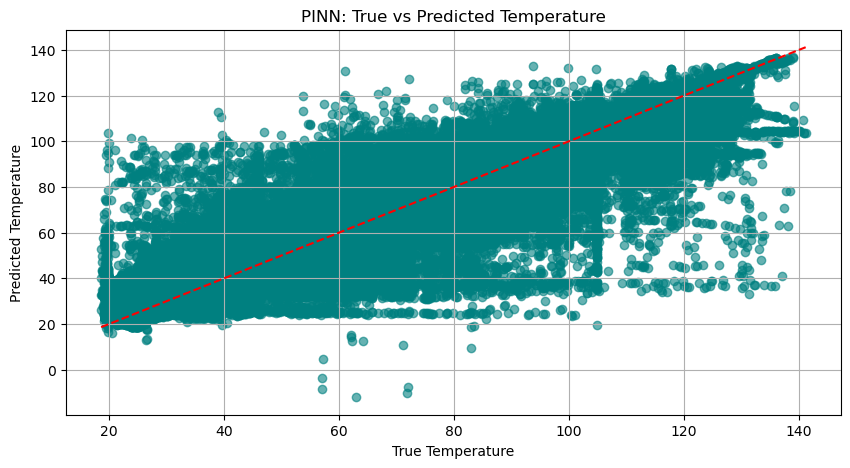

In [17]:
# 📌 Install TensorFlow (if needed)
!pip install tensorflow -q

# 📚 Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 📥 Load the dataset
df = pd.read_csv("measures_v2.csv")

# 🛠️ Preprocess coolant feature if categorical
if df['coolant'].dtype == 'object':
    df['coolant'] = df['coolant'].map({'Low': 0, 'Medium': 1, 'High': 2})

# ✅ Select relevant features and drop rows with missing data
required_columns = ['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant', 'stator_winding']
df_clean = df.dropna(subset=required_columns)
df_clean = df_clean[required_columns].apply(pd.to_numeric, errors='coerce').dropna()

# 📊 Define inputs (X) and target (y)
X = df_clean[['i_d', 'i_q', 'u_q', 'motor_speed', 'coolant']]
y = df_clean['stator_winding']

# ⚖️ Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔁 Convert to tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values.reshape(-1, 1), dtype=tf.float32)

# 🧠 Define the neural network model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1)
])

# ⚙️ Custom loss function: MSE + physics penalty (ensures physical realism)
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    physics_penalty = tf.reduce_mean(tf.square(tf.minimum(y_pred, 0.0)))  # Penalize negative temps
    return mse + 0.1 * physics_penalty

# 🛠️ Compile the model
model.compile(optimizer='adam', loss=custom_loss)

# 🏋️‍♂️ Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32, verbose=1)

# 📈 Predict and evaluate
y_pred = model.predict(X_test_tensor).flatten()
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\n📈 Physics-Informed Neural Network (PINN)")
print("✅ R² Score:", r2)
print("✅ RMSE:", rmse)

# 📊 Plot prediction vs true
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("True Temperature")
plt.ylabel("Predicted Temperature")
plt.title("PINN: True vs Predicted Temperature")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
